### Pick the following combination of images and perform histogram transformation on them.

In [9]:
%matplotlib inline

import cv2
import numpy as np
from collections import Counter
from PIL import Image
from matplotlib import pyplot as plt

In [10]:
def hist_match(source, template):

    oldshape = source.shape
    source = source.ravel()
    template = template.ravel()

    s_values, bin_idx, s_counts = np.unique(source, return_inverse=True, return_counts=True)
    t_values, t_counts = np.unique(template, return_counts=True)

    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]

    interp_t_values = np.interp(s_quantiles, t_quantiles, t_values)

    return interp_t_values[bin_idx].reshape(oldshape)

#### Similar Histograms

In [17]:
l = './DIP_2019_A1/lena.jpg'
l = cv2.imread(l, 0)

d = './DIP_2019_A1/q7_1.jpeg'
d = cv2.imread(d, 0)

In [18]:
matched = hist_match(l, d)

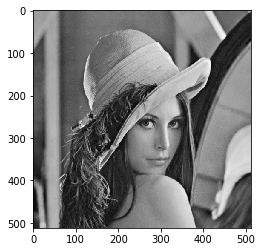

In [19]:
plt.imshow(matched, cmap='gray')
plt.show()

#### Dark →Light Image

In [11]:
l = './DIP_2019_A1/q2.png'
l = cv2.imread(l, 0)

d = './DIP_2019_A1/q2_4.jpg'
d = cv2.imread(d, 0)

In [12]:
matched = hist_match(d, l)

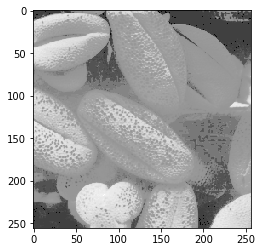

In [13]:
plt.imshow(matched, cmap='gray')
plt.show()

#### Light →Dark Image

In [14]:
l = './DIP_2019_A1/q2.png'
l = cv2.imread(l, 0)

d = './DIP_2019_A1/q2_4.jpg'
d = cv2.imread(d, 0)

In [15]:
matched = hist_match(l, d)

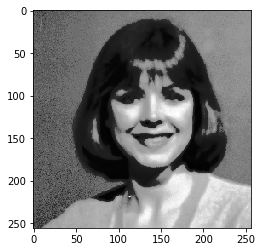

In [16]:
plt.imshow(matched, cmap='gray')
plt.show()